In [ ]:
# handling missing value in dataset is necessary?
"""
Yes, because many machine learning algorithm do not allow missing value.
"""

In [ ]:
# pre_processing_2 excel file

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the dataset
df=pd.read_excel("preprocessing_2.xlsx")
df.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.0,9,40000.0,Under_Graduate
1,HR,33.0,12,48000.0,Master
2,IT,35.0,12,45000.0,Master
3,IT,NaN,12,46000.0,Graduate
4,HR,34.0,11,NaN,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [4]:
df.describe()

,Age,Salary
count,26.000000,26.000000
mean,35.538462,39326.923077
std,16.966392,10157.698861
min,0.000000,22000.000000
25%,29.500000,35250.000000
50%,34.500000,41000.000000
75%,44.250000,45000.000000
max,75.000000,60000.000000


In [5]:
df.describe(include="O")#view the categorical info also

,Dept,Experience,Education
count,26,24,26
unique,4,12,4
top,HR,12,Master
freq,11,5,10


<AxesSubplot:xlabel='Salary'>

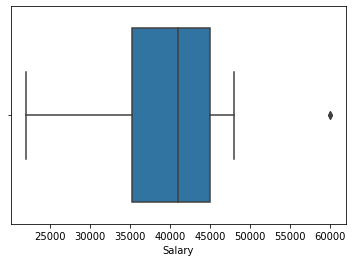

In [6]:
# finding the outlier visualization
sns.boxplot(df["Salary"])

<AxesSubplot:xlabel='Age'>

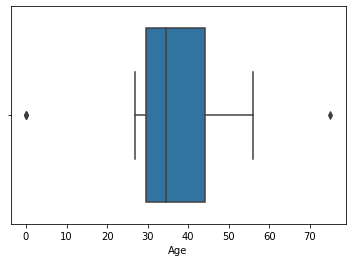

In [7]:
sns.boxplot(df["Age"])

In [8]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      Dept    Age  Experience  Salary  Education
0   False  False       False   False      False
1   False  False       False   False      False
2   False  False       False   False      False
3   False   True       False   False      False
4   False  False       False    True      False
5   False  False       False   False       True
6   False  False       False   False      False
7   False   True       False   False      False
8   False  False        True   False      False
9   False  False       False    True      False
10  False  False        True   False      False
11   True  False       False   False      False
12   True  False       False   False       True
13  False  False       False   False      False
14  False  False        True   False      False
15  False  False        True   False      False
16  False  False       False   False      False
17  False  False       False   False      False
18  False  False       Fal

In [9]:
df.isnull().any()

Dept          True
Age           True
Experience    True
Salary        True
Education     True
dtype: bool

In [10]:
df.isnull().sum()

Dept          2
Age           2
Experience    4
Salary        2
Education     2
dtype: int64

In [11]:
df.isnull().sum().sum()

12

In [12]:
# calculate the percentage of missing value
df.isnull().sum()/len(df)*100

Dept           7.142857
Age            7.142857
Experience    14.285714
Salary         7.142857
Education      7.142857
dtype: float64

In [ ]:
# isna() and isnull() functions are used for finding missing value

In [13]:
df.isna().sum().sum()

12

In [ ]:
# imputation approach :- MEAN , MEDIAN ,MODE.
"""
df["Experience"]=df["Experience"].fillna(df["Experience"].mean())
df["Experience"]=df["Experience"].fillna(df["Experience"].median())
df["Dept"]=df["Dept"].fillna(df["Dept"].mode()[0])
# important:- There can be multiple modes , it will take the first one by default.

"""

In [14]:
df1=df.copy()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [17]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean())

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [19]:
df1["Experience"]=df1["Experience"].fillna(df1["Experience"].mean())

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [20]:
# recheck the data type of experience , we find it is not numeric
# convert it into numeric
df1["Experience"]=pd.to_numeric(df1["Experience"])

ValueError: Unable to parse string "." at position 24

In [21]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq(".")),inplace=True)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  23 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [ ]:
# now in the experience column we have 5 missing value becuase we converted "." as null

In [23]:
# try again to convert it into numeric
df1["Experience"]=pd.to_numeric(df1["Experience"])

ValueError: Unable to parse string "%" at position 26

In [24]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq("%")),inplace=True)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  22 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [ ]:
# now in the experience column we have 6 missing value becuase we converted "%" as null

In [26]:
# try again to convert it into numeric
df1["Experience"]=pd.to_numeric(df1["Experience"])

ValueError: Unable to parse string "a" at position 27

In [27]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq("a")),inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  21 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [29]:
df1["Experience"]=pd.to_numeric(df1["Experience"])

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  21 non-null     float64
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [31]:
df1["Experience"]=df1["Experience"].fillna(df1["Experience"].mean())

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [33]:
df1["Salary"]=df1["Salary"].fillna(df1["Salary"].mean())

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [35]:
df1["Dept"].value_counts()

HR           11
IT            7
Sales         5
Marketing     3
Name: Dept, dtype: int64

In [36]:
df1["Education"].value_counts()

Master            10
Under_Graduate     8
Graduate           7
a                  1
Name: Education, dtype: int64

In [37]:
df1["Education"].mask((df1["Education"].eq("a")),inplace=True)

In [38]:
df1["Education"].isnull().sum()

3

In [39]:
df1["Education"]=df1["Education"].fillna(df1["Education"].mode())

In [40]:
df1["Education"].isnull().sum()

3

In [41]:
df1["Education"]=df1["Education"].fillna(df1["Education"].mode()[0])
df1["Education"].isnull().sum()

0

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [43]:
df1["Dept"]=df1["Dept"].fillna(df1["Dept"].mode()[0])
df1["Dept"].isnull().sum()

0

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        28 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [45]:
# in the age column there is one observation with 0 year
df1["Age"]=np.where(df1["Age"]==0,(df1["Age"].mean()),df1["Age"])

In [46]:
df1.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000


In [47]:
# one line of code to apply in many columns
col1=["Age","Experience","Salary"]
df1[col1]=df1[col1].fillna(df1[col1].median())

In [ ]:
# we can drop all missing value by using this code

In [48]:
df3=df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [49]:
df3.dropna(inplace=True)

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        17 non-null     object 
 1   Age         17 non-null     float64
 2   Experience  17 non-null     object 
 3   Salary      17 non-null     float64
 4   Education   17 non-null     object 
dtypes: float64(2), object(3)
memory usage: 816.0+ bytes


In [51]:
df3.describe()

,Age,Salary
count,17.000000,17.000000
mean,34.647059,38823.529412
std,15.783461,12115.255332
min,0.000000,22000.000000
25%,29.000000,26000.000000
50%,35.000000,40000.000000
75%,42.000000,45000.000000
max,56.000000,60000.000000


In [ ]:
# feature Engineering -outlier treatment

<AxesSubplot:ylabel='Age'>

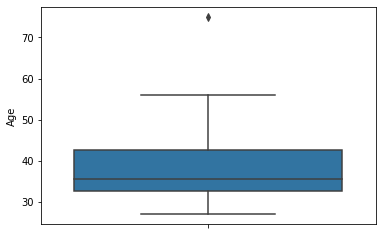

In [53]:
sns.boxplot(y="Age",data=df1)

<AxesSubplot:>

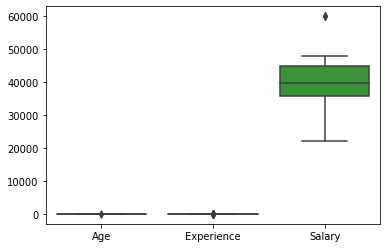

In [54]:
sns.boxplot(data=df1)

<AxesSubplot:ylabel='Salary'>

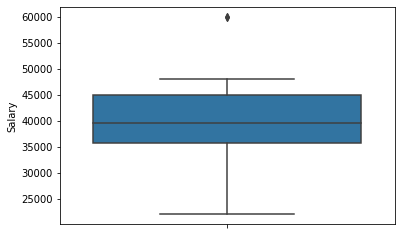

In [55]:
sns.boxplot(y="Salary",data=df1)

<AxesSubplot:ylabel='Experience'>

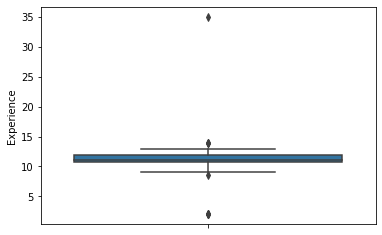

In [56]:
sns.boxplot(y="Experience",data=df1)

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

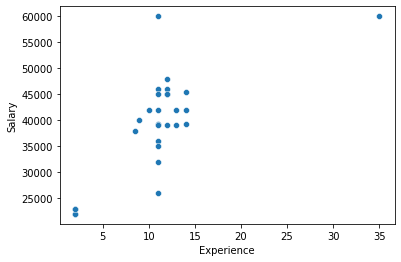

In [57]:
sns.scatterplot(x="Experience",y="Salary",data=df1)

<AxesSubplot:xlabel='Age', ylabel='Salary'>

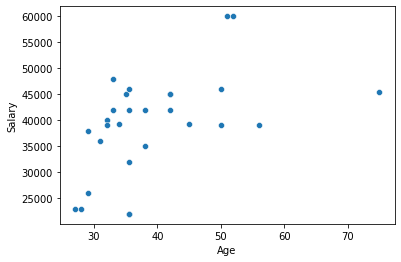

In [58]:
sns.scatterplot(x="Age",y="Salary",data=df1)

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

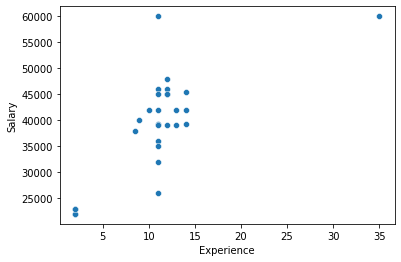

In [59]:
sns.scatterplot(x="Experience",y="Salary",data=df1)

In [ ]:
"""
# IQR approach 
positive outlier>Q3+1.5IQR
negative outlier<Q1-1.5IQR

#Z Score approach
positive outlier>mean+3 SD
negative outlier<mean-3 SD
"""

In [ ]:
# removal of outlier= trimming approach

In [60]:
df3=df1.copy()

In [61]:
# using IQR approach
"""
find the Q1,Q3,IQR, Upper_limit lower_limit
"""
Q1=df3.quantile(0.25)
Q3=df3.quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
print("Upper_limit \n",upper_limit)
lower_limit=Q1-1.5*IQR
print("Lower_limit \n",lower_limit)

Upper_limit 
 Age              57.750
Experience       13.875
Salary        58875.000
dtype: float64
Lower_limit 
 Age              17.750
Experience        8.875
Salary        21875.000
dtype: float64


In [ ]:
"""
(|)pipe function mean or either
(~)tilda function , it is comparing
any(axis=1) move column wise find the outlier and drop it.
"""

In [62]:
df4=df3[~((df3<(lower_limit))|(df3>(upper_limit))).any(axis=1)]

In [63]:
df4.describe()

,Age,Experience,Salary
count,18.000000,18.000000,18.000000
mean,37.867521,11.341270,40351.495726
std,7.431497,0.967320,5558.401940
min,29.000000,9.000000,26000.000000
25%,33.000000,11.005952,39000.000000
50%,35.538462,11.023810,41000.000000
75%,41.000000,12.000000,45000.000000
max,56.000000,13.000000,48000.000000


In [64]:
df3.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000
